the final accuracy is:  100.000000%
the final accuracy is:0.06


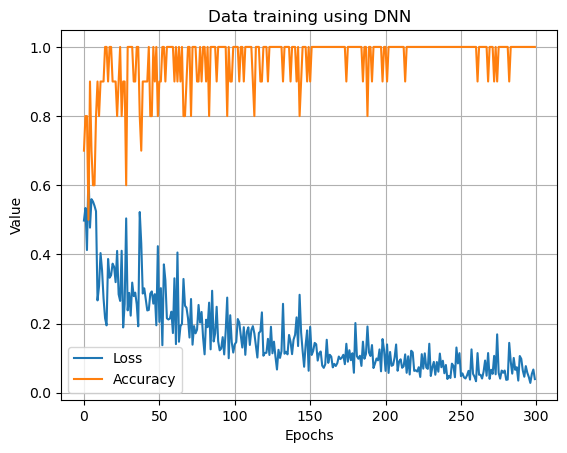

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Study Hours :2.5 --------> Pass Probability 0.02
Study Hours :5.5 --------> Pass Probability 0.76
Study Hours :9.5 --------> Pass Probability 1.00


In [1]:
# Deep neural network with batch normalization and dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# data sample
X= np.array([1,2,3,4,5,6,7,8,9,10],dtype=float)
y=np.array([0,0,0,0,0,1,1,1,1,1],dtype=float)

# DNN model 
model=keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(16,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(8,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation='sigmoid')
])

# compile model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
# fit model
history=model.fit(X,y,epochs=300,verbose=0)

# evaluate model
 #loss,acc=model.evaluate(X,y,verbose=0)
loss, acc = model.evaluate(X, y, verbose=0)
print(f"the final accuracy is: {acc*100 : 4f}%")
print(f"the final accuracy is:{loss :.2f}")

# plot model
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['accuracy'],label='Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Data training using DNN")
plt.grid(True)
plt.legend()
plt.show()

# prediction
test=np.array([2.5,5.5,9.5])
pred=model.predict(test)

for h,p in zip(test,pred):
    print(f"Study Hours :{h} --------> Pass Probability {p[0] :.2f}")